IMPORT LIBRARY

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import joblib


LOAD DATA

In [22]:
df= pd.read_csv('Stress-Lysis.csv')
df

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [23]:
print(df.head())

   Humidity  Temperature  Step count  Stress Level
0     21.33        90.33         123             1
1     21.41        90.41          93             1
2     27.12        96.12         196             2
3     27.64        96.64         177             2
4     10.87        79.87          87             0


In [24]:
X = df[['Humidity', 'Temperature', 'Step count']]
Y = df['Stress Level']

CEK DATA

In [25]:
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [26]:
df.isnull().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

SIAPKAN DATA

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


SIAPKAN DATA

In [28]:
X=df.drop(['Stress Level'],axis=1)
Y=df['Stress Level']
X.shape, Y.shape

((2001, 3), (2001,))

NORMALISASI DATA

In [29]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns.values)


SPLIT DATA

In [30]:
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

LATIH MODEL

In [31]:

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict (X_test)

SIMPAN MODEL DAN SCALER

In [33]:
import joblib
joblib.dump(model, 'Model_stres.pkl')
joblib.dump(scaler, 'scaler_stres.pkl')
joblib.dump(y_test, 'y_test.pkl')
joblib.dump(y_pred, 'y_pred.pkl')

['y_pred.pkl']

PREDIKSI DATA UJI

EVALUASI MODEL

In [34]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


CONFUSION MATRIX

Text(50.722222222222214, 0.5, 'True')

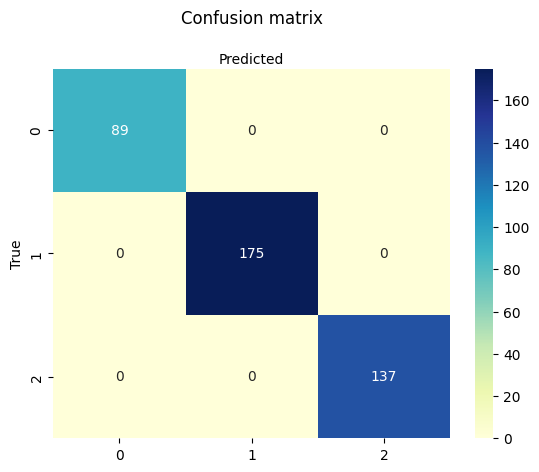

In [35]:
cnf_matrix= metrics.confusion_matrix(y_test, y_pred)
labels= [0, 1,2]
fig, ax =plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks (tick_marks, labels)
plt.yticks (tick_marks, labels)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot =True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Predicted')
plt.ylabel('True')

PREDIKSI BARU

In [36]:
import numpy as np
import joblib

# 1. Load model dan scaler
model = joblib.load("Model_stres.pkl")
scaler = joblib.load("scaler_stres.pkl")

# 2. Masukkan data input (kelembapan, suhu, jumlah langkah)
# Ganti angka berikut sesuai data yang ingin kamu prediksi
input_data = [10.87,79.87,87]

# 3. Ubah input menjadi array 2 dimensi & lakukan scaling
input_np = np.array(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_np)

# 4. Lakukan prediksi
hasil_prediksi = model.predict(input_scaled)

# 5. Mapping hasil prediksi ke kategori stres
label_stres = {
    0: "Tingkat stres kamu Rendah",
    1: "Tingkat stres kamu Sedang",
    2: "Tingkat stres kamu Tinggi"
}

# 6. Tampilkan hasil
print(f"Prediksi angka: [{hasil_prediksi[0]}]")
print(label_stres.get(hasil_prediksi[0], "Kategori tidak dikenali"))

Prediksi angka: [0]
Tingkat stres kamu Rendah


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
